<a href="https://colab.research.google.com/github/Lakshayti/Health-Insurance-Premium-Prediction/blob/main/Health_Insurance_Premium_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn.metrics
import io
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import spearmanr
from scipy.stats import pearsonr

In [ ]:
# Load data in df
from google.colab import files 
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['insurance.csv'])) 
# Number of Rows and Columns
df.shape

(1338, 7)

In [ ]:
# First few rows
df.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
# Statistical description of data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Check for Null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Get unique values of regions
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f9c28a978>,
      dtype=object)

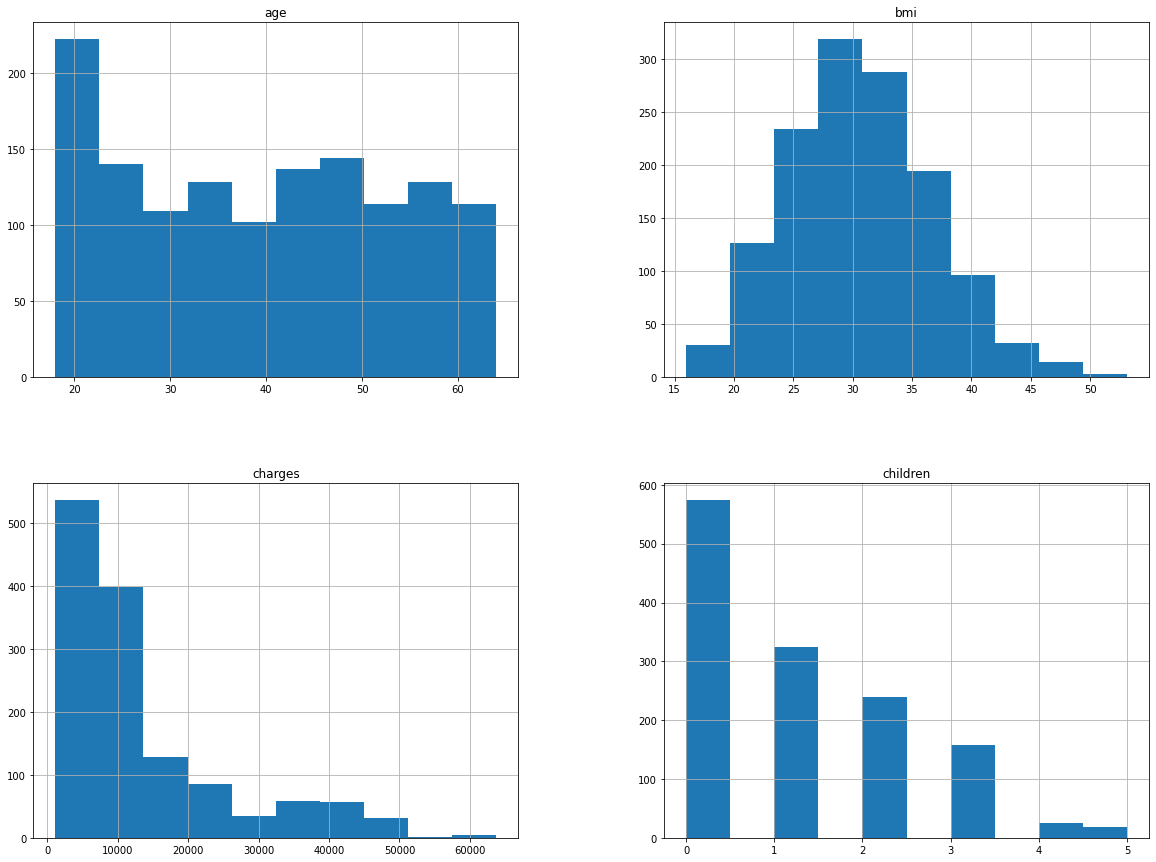

In [ ]:
# Display histogram of frequency distribution
df.hist(figsize=(20,15))

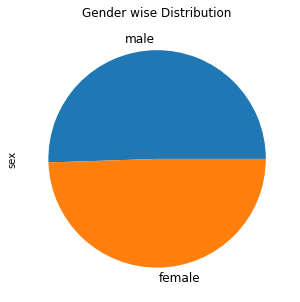

In [ ]:
# Pie chart for Sex
df.sex.value_counts().plot.pie(title='Gender wise Distribution', figsize= (5,5), fontsize=12)

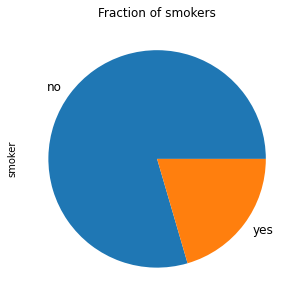

In [ ]:
# Pie chart for Smoker
df.smoker.value_counts().plot.pie(title='Fraction of smokers', figsize= (5,5), fontsize=12)

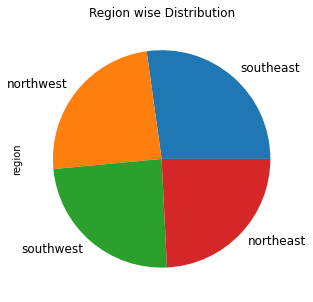

In [ ]:
# Pie chart for Region
df.region.value_counts().plot.pie(title='Region wise Distribution', figsize= (5,5), fontsize=12)

In [ ]:
# Spearman’s Correlation between Age and Charges
corr_spr = spearmanr(df.charges, df.age)
corr_spr

SpearmanrResult(correlation=0.534392133771846, pvalue=1.1306920278035412e-99)

In [ ]:
# Pearson’s Correlation between Age and Charges
corr_prs = pearsonr(df.charges, df.age)
corr_prs

(0.2990081933306476, 4.8866933317203816e-29)

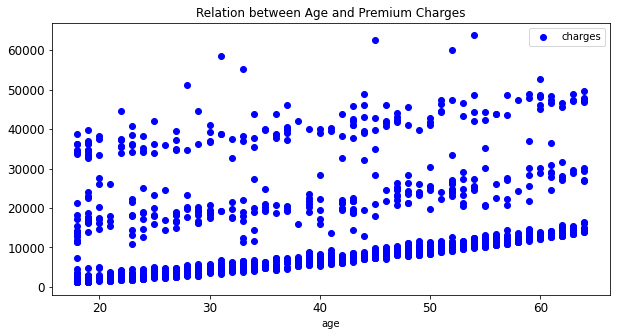

In [ ]:
# Plot Age and Charges
df.plot(x='age', y='charges', style='bo', title='Relation between Age and Premium Charges', figsize=(10,5), fontsize=12)

In [ ]:
# Spearman’s Correlation between BMI and Charges
corr_spr = spearmanr(df.charges, df.bmi)
corr_spr

SpearmanrResult(correlation=0.11939590358331147, pvalue=1.1926059544526826e-05)

In [ ]:
# Pearson’s Correlation between BMI and Charges
corr_prs = pearsonr(df.charges, df.bmi)
corr_prs

(0.1983409688336288, 2.459085535117846e-13)

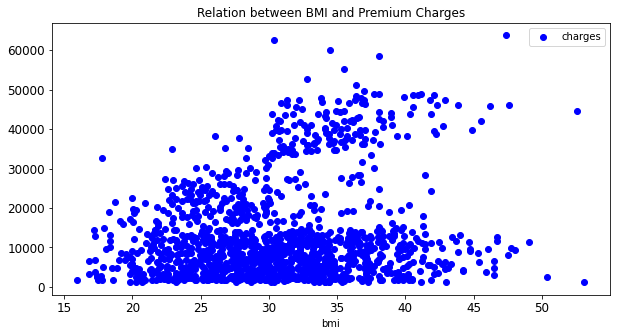

In [ ]:
# Plot BMI and Charges
df.plot(x='bmi', y='charges', style='bo', title='Relation between BMI and Premium Charges', figsize=(10,5), fontsize=12)

In [ ]:
# Spearman’s Correlation between Number of Children and Charges
corr_spr = spearmanr(df.charges, df.children)
corr_spr

SpearmanrResult(correlation=0.13333894319168219, pvalue=9.846806132997262e-07)

In [ ]:
# Pearson’s Correlation between Number of Children and Charges
corr_prs = pearsonr(df.charges, df.children)
corr_prs

(0.0679982268479048, 0.012852128520141125)

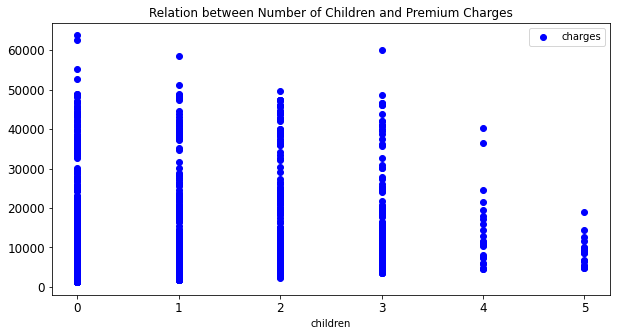

In [ ]:
# Plot No. Of Children and Charges
df.plot(x= 'children', y='charges', style='bo', title='Relation between Number of Children and Premium Charges', figsize=(10,5), fontsize=12)

In [ ]:
# Regression
# X contains independent variables, y contains dependent variable
X= df [['age', 'sex', 'bmi', 'children' , 'smoker', 'region' ]]
y= df['charges']

# Dummy values for categorical data (One Hot Encoding)
X = pd.get_dummies(data=X)
X.shape

(1338, 11)

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2, random_state = 1)
# random_size guarantees that the split will always be the same

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 11)
(268, 11)
(1070,)
(268,)


In [ ]:
# Linear Regression
lin= linear_model.LinearRegression()
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Linear Regression coefficients
lin.coef_

array([   257.49024669,    321.62189278,    408.06102001,    121.0765328 ,
         -121.0765328 , -11893.24302268,  11893.24302268,    584.37636275,
          188.27979919,   -453.99951691,   -318.65664503])

In [ ]:
# Linear Regression Intercept
lin.intercept_

-109.81988139966597

In [ ]:
# Linear Regression Prediction
y_test_pred_lin = lin.predict(X_test)

In [ ]:
# Linear Regression Model Performance
print("Linear Regression Model Performance:")
print("Root Mean Squared Error = ", sklearn.metrics.mean_squared_error(y_test, y_test_pred_lin, squared=False))
print("Mean Absolute Error = ", sklearn.metrics.mean_absolute_error(y_test, y_test_pred_lin))
print("Explained Variance Score = ", sklearn.metrics.explained_variance_score(y_test, y_test_pred_lin))
print("R2 Score = ", sklearn.metrics.r2_score(y_test, y_test_pred_lin))

Linear Regression Model Performance:
Root Mean Squared Error =  5956.454717976427
Mean Absolute Error =  4051.858766747046
Explained Variance Score =  0.7623598740020212
R2 Score =  0.7623311844057112


In [ ]:
# Polynomial Regression with degree 2
poly = sklearn.preprocessing.PolynomialFeatures(degree = 2, interaction_only=True)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly,y_train)
lin2 = linear_model.LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Polynomial Regression Prediction with degree 2
y_test_pred_poly = lin2.predict(poly.fit_transform(X_test))

In [ ]:
# Polynomial Regression Model Performance with degree 2
print("Polynomial Regression Model Performance with degree 2:")
print("Root Mean Squared Error = ", sklearn.metrics.mean_squared_error(y_test, y_test_pred_poly, squared=False))
print("Mean Absolute Error = ", sklearn.metrics.mean_absolute_error(y_test, y_test_pred_poly))
print("Explained Variance Score = ", sklearn.metrics.explained_variance_score(y_test, y_test_pred_poly))
print("R2 Score = ", sklearn.metrics.r2_score(y_test, y_test_pred_poly))

Polynomial Regression Model Performance with degree 2:
Root Mean Squared Error =  4586.3772326492235
Mean Absolute Error =  2675.5940037189325
Explained Variance Score =  0.8590975976232729
R2 Score =  0.8590918676722223


In [ ]:
# Polynomial Regression with degree 3
poly = sklearn.preprocessing.PolynomialFeatures(degree = 3, interaction_only=True)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly,y_train)
lin2 = linear_model.LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Polynomial Regression Prediction with degree 3
y_test_pred_poly = lin2.predict(poly.fit_transform(X_test))

In [ ]:
# Polynomial Regression Model Performance with degree 3
print("Polynomial Regression Model Performance with degree 3:")
print("Root Mean Squared Error = ", sklearn.metrics.mean_squared_error(y_test, y_test_pred_poly, squared=False))
print("Mean Absolute Error = ", sklearn.metrics.mean_absolute_error(y_test, y_test_pred_poly))
print("Explained Variance Score = ", sklearn.metrics.explained_variance_score(y_test, y_test_pred_poly))
print("R2 Score = ", sklearn.metrics.r2_score(y_test, y_test_pred_poly))

Polynomial Regression Model Performance with degree 3:
Root Mean Squared Error =  5404.261594461826
Mean Absolute Error =  3402.1903988409513
Explained Variance Score =  0.8045289516959546
R2 Score =  0.8043547813189561
